In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### 載入資料
第一次需要花點時間載入

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 訓練資料
len(x_train)

60000

In [5]:
# 測試資料
len(x_test)

10000

In [6]:
# 第87筆測試資料
X = x_train[87]

In [7]:
X

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [8]:
# 28*28的矩陣記錄手寫數字
X.shape

(28, 28)

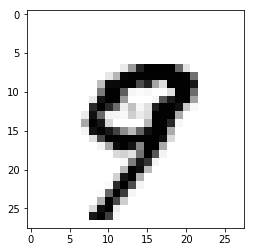

In [9]:
# 透過灰階顯示數字
plt.imshow(X, cmap='Greys')

In [10]:
# 第87筆的解答
y_train[87]

9

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
x_test.shape

(10000, 28, 28)

In [13]:
# 將資料reshape成一維矩陣
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [14]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
from keras.utils import np_utils

In [16]:
# 將解答分類 : 0~9
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

### 第87筆的解答
* 已被分類，第九個位置為1，表示該手寫圖形為9。

In [17]:
y_train[87]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [19]:
model = Sequential()

### 更改神經元數量

In [20]:
# 神經元個數、輸入的維度
model.add(Dense(87, input_dim=784))

# 激發函數：sigmoid
model.add(Activation('sigmoid'))

### 各層通常使用相同的激發函數

In [21]:
model.add(Dense(45))
model.add(Activation('sigmoid'))

In [22]:
# 輸出10個維度(0~9)
model.add(Dense(10))
model.add(Activation('softmax'))

In [23]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 87)                68295     
_________________________________________________________________
activation_1 (Activation)    (None, 87)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 45)                3960      
_________________________________________________________________
activation_2 (Activation)    (None, 45)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                460       
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 72,715
Trainable params: 72,715
Non-trainable params: 0
_________________________________________________________________


### 開始訓練

In [25]:
model.fit(x_train, y_train, batch_size=10, epochs=20, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0769 - acc: 0.4329 - val_loss: 0.0616 - val_acc: 0.6497
Epoch 2/20
60000/60000 [==============================] - 10s 168us/step - loss: 0.0481 - acc: 0.7518 - val_loss: 0.0353 - val_acc: 0.8234
Epoch 3/20
60000/60000 [==============================] - 10s 165us/step - loss: 0.0285 - acc: 0.8564 - val_loss: 0.0227 - val_acc: 0.8867
Epoch 4/20
60000/60000 [==============================] - 12s 192us/step - loss: 0.0210 - acc: 0.8884 - val_loss: 0.0183 - val_acc: 0.8982
Epoch 5/20
60000/60000 [==============================] - 10s 171us/step - loss: 0.0174 - acc: 0.9027 - val_loss: 0.0164 - val_acc: 0.9075
Epoch 6/20
60000/60000 [==============================] - 10s 169us/step - loss: 0.0157 - acc: 0.9088 - val_loss: 0.0153 - val_acc: 0.9105
Epoch 7/20
60000/60000 [==============================] - 11s 183us/step - loss: 0.0149 - acc: 0.9128 - val_loss: 0.

In [27]:
predict = model.predict_classes(x_test)
predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

### 顯示圖案

In [40]:
def test(id):
  plt.imshow(x_test[id].reshape(28,28), cmap='Greys')
  print("神經網路判斷為", predict[id])

神經網路判斷為 2


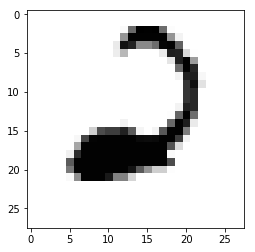

In [41]:
test(9487)

In [42]:
score = model.evaluate(x_test, y_test)
print("loss：", score[0])
print("正確率：", score[1])

10000/10000 [==============================] - 0s 30us/step
loss： 0.010085587518382818
正確率： 0.9364
